In [1]:
install.packages('effects')

Installing package into 'C:/Users/nolan/OneDrive/Documents/R/win-library/4.1'
(as 'lib' is unspecified)



package 'effects' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\nolan\AppData\Local\Temp\RtmpOkwi5P\downloaded_packages


In [2]:
install.packages('multcomp')

Installing package into 'C:/Users/nolan/OneDrive/Documents/R/win-library/4.1'
(as 'lib' is unspecified)



package 'multcomp' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\nolan\AppData\Local\Temp\RtmpOkwi5P\downloaded_packages


In [3]:
library("rcompanion")
library("car")
library("effects")
library("multcomp")


Loading required package: carData

lattice theme set by effectsTheme()
See ?effectsTheme for details.

Loading required package: mvtnorm

Loading required package: survival

Loading required package: TH.data

Loading required package: MASS


Attaching package: 'TH.data'


The following object is masked from 'package:MASS':

    geyser




In [4]:
data = read.csv('../../datasets/cellPhone.csv')

In [5]:
head(data)

,State,Account.Length,Area.Code,Phone,International.Plan,vMail.Plan,vMail.Message,Day.Mins,Day.Calls,Day.Charge,...,Eve.Calls,Eve.Charge,Night.Mins,Night.Calls,Night.Charge,International.Mins,International.Calls,International.Charge,CustServ.Calls,Churn
,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<dbl>,<int>,<dbl>,...,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>,<int>
1,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
2,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
3,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
4,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
5,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
6,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0


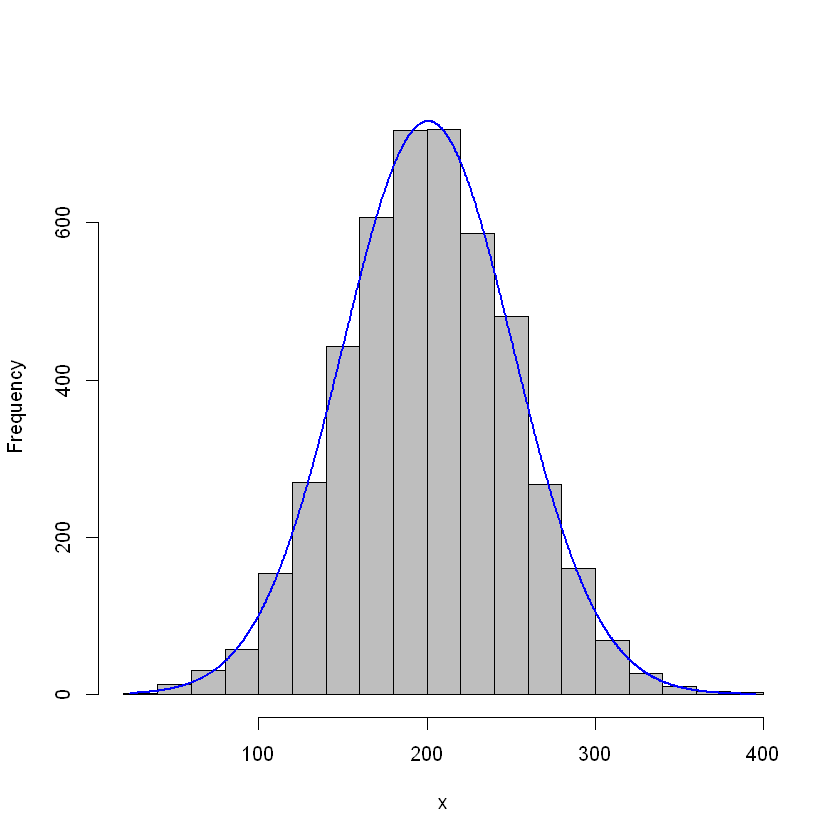

In [6]:
plotNormalHistogram(data$Night.Mins)

In [7]:
## looks approx normally distributed

In [8]:
leveneTest(Night.Mins ~ International.Plan, data = data)

Warning message in leveneTest.default(y = y, group = group, ...):
"group coerced to factor."


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,0.8645784,0.3525092
,4615,NA,NA


In [9]:
## test shows no significance aka assumption of homogeneity of variance has been met

In [10]:
lin = lm(Night.Mins ~ vMail.Plan, data = data)

In [11]:
anova(lin)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
vMail.Plan,1,4.877302e+02,487.7302,0.1908846,0.6622018
Residuals,4615,1.179181e+07,2555.1049,NA,NA


In [12]:
## test shows no significance aka assumption of homogeneity of regression slops has been met

In [13]:
ANCOVA = lm(Night.Mins~vMail.Plan + International.Plan*vMail.Plan, data= data)
anova(ANCOVA)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
vMail.Plan,1,4.877302e+02,487.7302,0.1909381,0.66215744
International.Plan,1,7.978627e+03,7978.6270,3.1234975,0.07723709
vMail.Plan:International.Plan,1,4.349520e+02,434.9520,0.1702763,0.67988552
Residuals,4613,1.178340e+07,2554.3888,NA,NA
